## Introduction to Stats in Python Studio

Fork and clone [this repository](https://github.com/codinglikeagirl42/IntroToStatsStudio) to your computer and open with Juypter Notebooks. <br>

We are going to be working with this [dataset](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data) from Kaggle.  No need to download it is included in the git repository you just cloned.



In [2]:
# Import libries need with alias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


# Set style and font size
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

# Read in data to a dataframe
df = pd.read_csv('heartdata/heart3.csv')


## Section 1: First look at the data:

In [3]:
# Look at the first 5 rows.
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Display all columns and their data types with.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# Find out the types of variable for each column(example sex = 2 male/female)
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

Which of our columns are catogorical data?
<BR>
DEATH_EVENT<BR>
sex<BR>
anemia<BR>
diabetes<BR>
high_blood_preasure<BR>
smoking<BR>
<BR>
Which of our columns are continuous?
<BR>
age<BR>
creatinine_phosphokinase<BR>
ejection_fraction<BR>
platelets<BR>
serum_creatinine<BR>
serum_sodium<BR>
time<BR>

In [6]:
# Checking for missing data.
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

There is no missing data but we will need to make a decission on how to treat our catagorical data a bit later.



In [7]:
#df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
#df['anaemia'] = df.anaemia.replace({1: "Yes", 0: "No"})
#df['diabetes'] = df.diabetes.replace({1: "Yes", 0: "No"})
#df['high_blood_pressure'] = df.high_blood_pressure.replace({1: "Yes", 0: "No"})
#df['smoking'] = df.smoking.replace({1: "Yes", 0: "No"})

#df['DEATH_EVENT'] = df.DEATH_EVENT.replace({1: "Died", 0: "Alive"})

In [8]:
# Run decriptive analysis on your variable
df['sex'].describe()

count    299.000000
mean       0.648829
std        0.478136
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

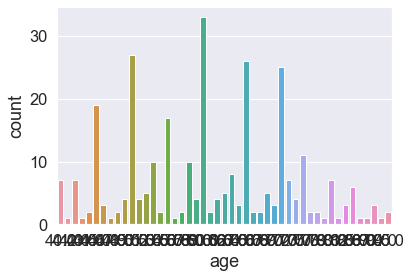

In [42]:
sns.countplot(df['age'])
plt.show()

In [15]:
#max value of our variable
df['age'].max()

1

In [11]:
#min value of our variable
df['age'].min()

40.0

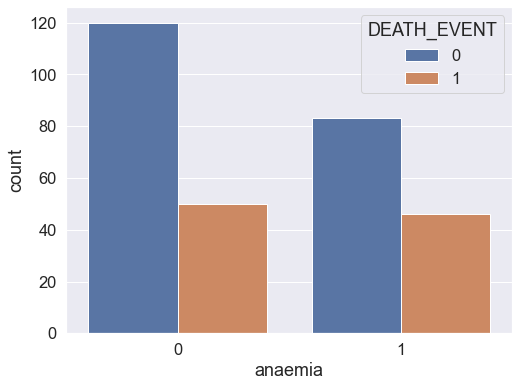

In [20]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="anaemia", hue="DEATH_EVENT", data=df)
plt.show()

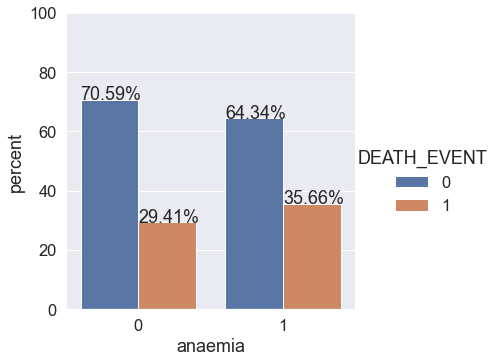

In [21]:
x,y = 'anaemia', 'DEATH_EVENT'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

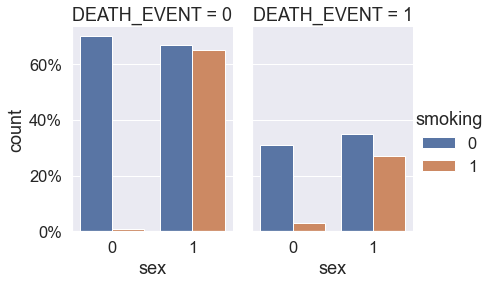

In [15]:
from  matplotlib.ticker import PercentFormatter

p = sns.catplot(x="sex", hue="smoking", col="DEATH_EVENT", data=df, kind="count", height=4, aspect=.7);

for ax in p.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter())
plt.show()

### Statistical interpertation of our data?

Mean, Min, Max, STD?
<br>
#### What could the numbers in our catogorical data tell us?
They are percentages: 43 percent of our patients have anemia 65 percent are male...
<br>

####  Why might we want to keep our catagorical data as 1's and 0's? Why may we want to use the something like the code below to change it?



## Section 2: Distribution of our data:

<function matplotlib.pyplot.show(close=None, block=None)>

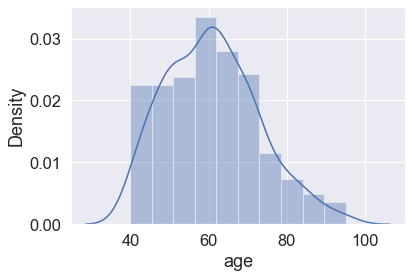

In [17]:
sns.distplot(df['age'])
plt.show

<AxesSubplot:>

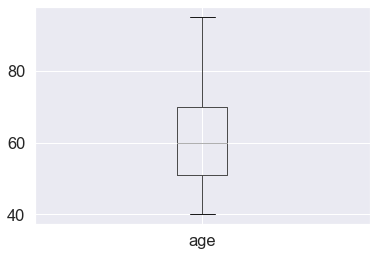

In [40]:
# Create boxplot to show distribution of variable
df.boxplot(column=['age'])

In [31]:
# Check the skewness of our variable
df['age'].skew()

0.42306190672863536

In [32]:
# Check the kurtosis of our variable
df['age'].kurtosis()

-0.18487053195417413

### Interpertation of how our data is distributed?
Looking at the above graphs what can you tell about the distibution of your variable?
<br><br><br><br><br>
What is the skewness and kurtosis of your variable.  What does this mean?<br>
<br><br><br><br><br>


In [31]:
# Use group by method and your two variables
# Use describe on the reshaped data


df[['sex', 'ejection_fraction']].groupby(['sex']).describe()



ejection_fraction                                                    
                count       mean        std   min   25%   50%   75%   max
sex                                                                      
0               105.0  40.466667  12.728728  15.0  30.0  38.0  50.0  80.0
1               194.0  36.793814  11.144308  14.0  30.0  35.0  40.0  62.0

<AxesSubplot:title={'center':'ejection_fraction'}, xlabel='sex'>

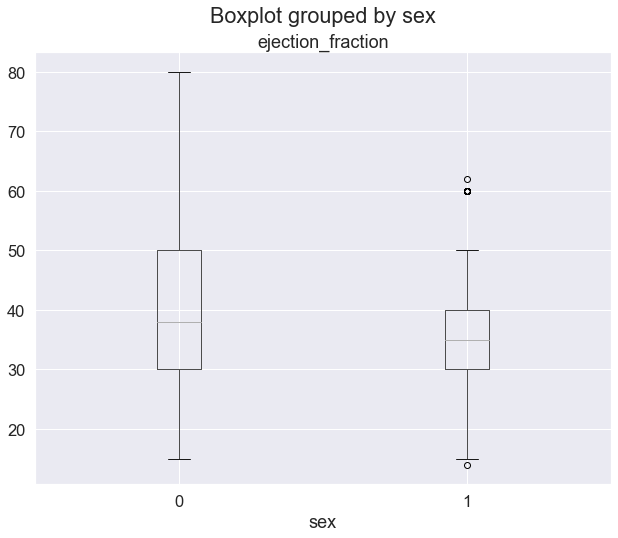

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['ejection_fraction'], by='sex', ax=ax)

#### What are some of the difference you note looking at a catagorical variable vs a continuous variable?

## Section 3: Finding Correlations

Lets start by breaking our data into two.  

In [19]:
# splitting the dataframe into 2 parts
# on basis of ‘DEATH_EVENT’ column values
df_died = df[df['DEATH_EVENT'] == 1 ]
df_lived = df[df['DEATH_EVENT'] == 0 ]

In [20]:
df_died.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.066246,-0.163145,-0.149389,0.216885,0.054218,0.072379,0.063218,0.035503,0.171186,0.117177,-0.187616,NaN
anaemia,0.066246,1.000000,-0.256866,-0.049344,0.067672,0.013267,0.034991,0.068249,0.036670,-0.161678,-0.106841,-0.113151,NaN
creatinine_phosphokinase,-0.163145,-0.256866,1.000000,0.035928,0.021621,-0.067492,0.078808,-0.033407,0.148823,0.091893,-0.081419,0.023616,NaN
diabetes,-0.149389,-0.049344,0.035928,1.000000,0.103865,0.032266,0.068733,-0.087405,-0.008493,-0.257708,-0.022792,-0.025339,NaN
ejection_fraction,0.216885,0.067672,0.021621,0.103865,1.000000,-0.026012,0.017271,0.229533,0.172754,-0.241338,-0.106528,-0.121778,NaN
high_blood_pressure,0.054218,0.013267,-0.067492,0.032266,-0.026012,1.000000,0.150227,0.065223,0.022913,-0.141357,0.082937,-0.183728,NaN
platelets,0.072379,0.034991,0.078808,0.068733,0.017271,0.150227,1.000000,-0.029384,0.141284,-0.023662,0.135119,-0.092743,NaN
serum_creatinine,0.063218,0.068249,-0.033407,-0.087405,0.229533,0.065223,-0.029384,1.000000,-0.094011,-0.055784,-0.046381,0.015743,NaN
serum_sodium,0.035503,0.036670,0.148823,-0.008493,0.172754,0.022913,0.141284,-0.094011,1.000000,-0.014227,-0.014680,0.021192,NaN
sex,0.171186,-0.161678,0.091893,-0.257708,-0.241338,-0.141357,-0.023662,-0.055784,-0.014227,1.000000,0.358297,-0.036818,NaN


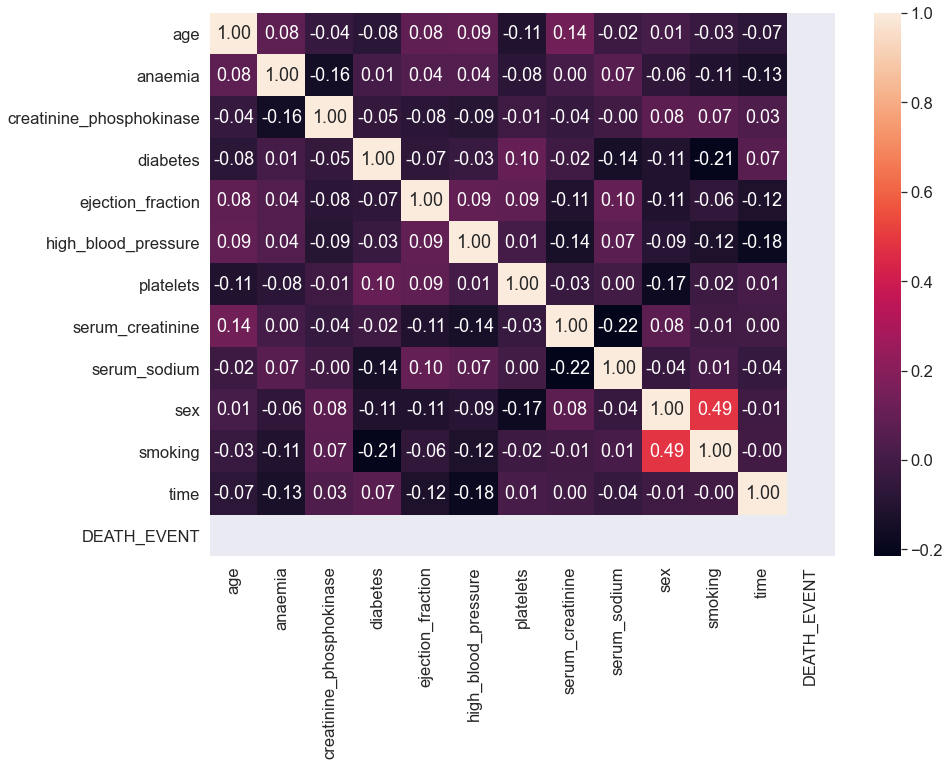

In [29]:
# Graph heatmap to visualize correlations(correlation matrix)
fig, ax = plt.subplots(figsize = (14,10))
ax = sns.heatmap(df_lived.corr(), annot=True, fmt='.2f')
plt.show()


In [24]:
# Create a correlation matrix table with your variables: 
group=df.groupby(['age']).sum()
corr = group.corr()
corr

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
anaemia,1.000000,0.675458,0.903700,0.884110,0.772018,0.861596,0.889563,0.888365,0.872582,0.840073,0.819679,0.825088
creatinine_phosphokinase,0.675458,1.000000,0.794545,0.849434,0.640389,0.879881,0.793207,0.853231,0.875083,0.745006,0.865233,0.737934
diabetes,0.903700,0.794545,1.000000,0.938656,0.822058,0.935454,0.921609,0.946285,0.905827,0.851752,0.904397,0.872357
ejection_fraction,0.884110,0.849434,0.938656,1.000000,0.884137,0.990149,0.938956,0.995376,0.972789,0.928931,0.972872,0.864050
high_blood_pressure,0.772018,0.640389,0.822058,0.884137,1.000000,0.879232,0.824888,0.892434,0.842071,0.846455,0.851572,0.837849
platelets,0.861596,0.879881,0.935454,0.990149,0.879232,1.000000,0.916637,0.992963,0.971176,0.912613,0.979720,0.866223
serum_creatinine,0.889563,0.793207,0.921609,0.938956,0.824888,0.916637,1.000000,0.940055,0.926400,0.883625,0.868813,0.920804
serum_sodium,0.888365,0.853231,0.946285,0.995376,0.892434,0.992963,0.940055,1.000000,0.975995,0.930463,0.976777,0.877307
sex,0.872582,0.875083,0.905827,0.972789,0.842071,0.971176,0.926400,0.975995,1.000000,0.922620,0.955985,0.848365
smoking,0.840073,0.745006,0.851752,0.928931,0.846455,0.912613,0.883625,0.930463,0.922620,1.000000,0.899553,0.792515


[]

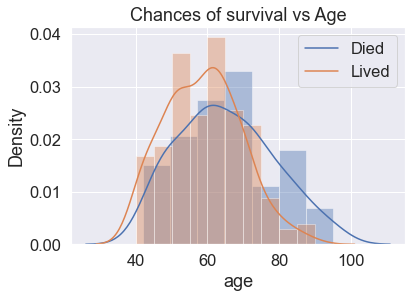

In [50]:
sns.distplot(df_died['age'])
sns.distplot(df_lived['age'])
plt.title("Chances of survival vs Age")
plt.legend(('Died','Lived'))
plt.plot()


### What things can you infer if we consider our data a sample of the population, based on your variables.

    Click here to add your thoughts.

Text(0.5, 1.0, 'Men and women survival rates')

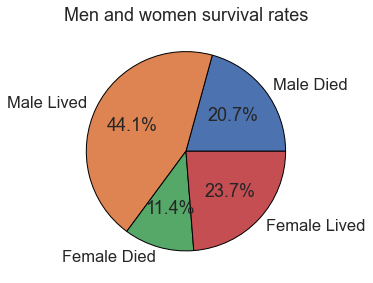

In [43]:
male = df[df.sex ==1]
female = df[df.sex == 0 ]

male_lived = male[male.DEATH_EVENT ==0]
male_died = male [male.DEATH_EVENT ==1]
female_lived = female[female.DEATH_EVENT ==0]
female_died =  female[female.DEATH_EVENT ==1]
data = [len(male_died), len(male_lived),len(female_died),len(female_lived)]
plt.pie(x=data,labels=['Male Died','Male Lived', 'Female Died','Female Lived'],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.tight_layout()
plt.title('Men and women survival rates')

Text(0.5, 1.0, 'Men vs Women in Sample')

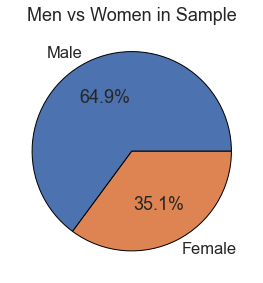

In [44]:
data =[len(male), len(female)]
plt.pie(x=data,labels=['Male', 'Female'],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.tight_layout()
plt.title('Men vs Women in Sample')